<div align="center"> 
<img src='./img/header.png' height='160px'/>
</div>

# Introduction

### [Global Ice Velocities](https://its-live.jpl.nasa.gov/)
    
The Inter-mission Time Series of Land Ice Velocity and Elevation (ITS_LIVE) project facilitates ice sheet, ice shelf and glacier research by providing a globally comprehensive and temporally dense multi-sensor record of land ice velocity and elevation with low latency.

### Velocity granules
    
All image pairs are processed using the JPL autonomous Repeat Image Feature Tracking algorithms (auto-RIFT), first presented in (Gardner et al., 2018). Release v00.0 of the ITS_LIVE velocity mosaics use auto-RIFT Version 1. This ITS_LIVE data set uses surface displacements generated by image pairs  in repeat orbits, and image pairs generated by overlap areas of adjacent or near-adjacent orbits. Image pairs collected from the same satellite position ("same-path-row") are searched if they have a time separation of fewer than 546 days. This approach was used for all satellites in the Landsat series (L4 to L8). To increase data density prior to the launch of Landsat 8, images acquired from differing satellite positions, generally in adjacent or near-adjacent orbit swaths ("cross-path-row"), are also processed if they have a time separation between 10 and 96 days and an acquisition date prior to 14 June 2013(beginning of regular Landsat 8 data). Feature tracking of cross-path-row image pairs produces velocity fields with a lower signal-to-noise ratio due to residual parallax from imperfect terrain correction. Same-path-row and cross-path-row preprocessed pairs of images are searched for matching features by finding local normalized cross-correlation (NCC) maxima at sub-pixel resolution by oversampling the correlation surface by a factor of 16 using a Gaussian kernel. A sparse grid pixel-integer NCC search (1/16 of the density of full search grid) is used to determine areas of coherent correlation between image pairs. For more information, see the Normalized Displacement Coherence (NDC) filter described in Gardner et al. (2018)


### Coverage

Scene-pair velocities generated from satellite optical and radar imagery.

* Coverage: All land ice
* Date range: 1985-present
* Resolution: 240m
* Scene-pair separation: 6 to 546 days

### Search API

The *itslive-search* API hosted at NSIDC allows us to find granules of interest. Because of its high temporal and spatial resolution, ITS_LIVE data amounts to 8+ million NetCDF files stored in AWS S3.

> Note: This API returns a list of the granule's URLs on AWS S3 that match our search criteria not the actual data itself. 

The main parameters are the area and time of interest and others that are dataset-especific like the percentage of valid data on each image pair. To visualize how the spatial matching works take a look at the following figure. 

#### Spatial matching
<div align="left"> 
<img src='./img/itslive-selection.png' height='160px'/>
</div>

ITS_LIVE data com from multiple scenes and satellites, which means a lot of overlap. In this case all the scenes that match with our spatial criteria will be returned.

> **For practical reasons, it's better to search on a glacier scale rather than larger areas. This notebook will use Pine Island Glacier for demo purposes.**

#### Search parameters

* **polygon/bbox**: LON-LAT pairs separated by a comma.
* **start**: YYYY-mm-dd start date
* **end**: YYYY-mm-dd end date
* **min_separation**: minimum days of separation
* **max_separation**: maximum days of separation
* **percent_valid_pixels**: % of valid glacier coverage
* **serialization**: json,html,text

#### itslive-search via CURL

We can directly query the itslive-search API using curl. i.e.

```bash
curl -X GET "https://nsidc.org/apps/itslive-search/velocities/urls/?polygon=-68.0712890625%2C-69.77135571628376%2C-65.19287109375%2C-69.77135571628376%2C-65.19287109375%2C-68.19605229820671%2C-68.0712890625%2C-68.19605229820671%2C-68.0712890625%2C-69.77135571628376&start=2000-01-01&end=2020-01-01&percent_valid_pixels=80" -H  "accept: application/json"
```

---

* If you want to query our API directly using  your own software here is the OpenApi endpoint https://nsidc.org/apps/itslive-search/docs
* For questions about this notebook and the dataset please contact users services at nsidc@nsidc.org

In [1]:
from SearchWidget import map
# horizontal=render in notebook. vertical = render in sidecar
m = map(orientation='horizontal')
m.display()

Output(layout=Layout(border='1px solid black'))

### Workflow

1. If you use the widget to download the velocity granules, you can go all the way to Data Processing section.
2. if you prefer to use code you can execute the following cells.

In [33]:
# you can also define your own parameters and skip the widget.

# Pine Island Glacier
params = {
    'polygon': '-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387',
    'start': '1984-01-01',
    'end': '2020-01-01',
    'percent_valid_pixels': 30,
    'min_separation': 6,
    'max_separation': 120
}

granule_urls = m.Search(params)
print(f'Total granules found: {len(granule_urls)}')

Querying: https://nsidc.org/apps/itslive-search/velocities/urls/?polygon=-101.1555,-74.7387,-99.1172,-75.0879,-99.8797,-75.46,-102.425,-74.925,-101.1555,-74.7387&start=1984-01-01&end=2020-01-01&percent_valid_pixels=30&min_interval=6&max_interval=120
Total granules found: 2246


### Filtering

More than a thousand granules doesn't seem much but it's not trivial if you only want to get a glance of the behavior of a particular glacier over the years. For this reason we can limit the number of granules per year and download only those with a given month as a middate, this is useful if the glacier is affected by seasonal cycles.

In [34]:
# filter_urls requires a list of urls, the result is stored in the m.filtered_urls attribute
filtered_granules_by_year = m.filter_urls(granule_urls,
                                          max_files_per_year=10,
                                          months=['November', 'December', 'January'],
                                          by_year=True)

# We print the counts per year
for k in filtered_granules_by_year:
    print(k, len(filtered_granules_by_year[k]))
print(f'Total granules after filtering: {len(m.filtered_urls)}')

1996 2
1997 1
2000 3
2001 10
2002 10
2003 7
2005 2
2006 4
2007 10
2008 10
2009 10
2010 10
2011 10
2012 10
2013 10
2014 10
2015 10
2016 10
2017 10
2018 10
2019 10
Total granules after filtering: 169


In [36]:
# This one only caps the number of granules per year
filtered_granules_by_year = m.filter_urls(granule_urls,
                                  max_files_per_year=10,
                                  by_year=True)

# We print the counts per year
for k in filtered_granules_by_year:
    print(k, len(filtered_granules_by_year[k]))
print(f'Total granules after filtering: {len(m.filtered_urls)}')

1996 2
1997 5
2000 4
2001 10
2002 10
2003 10
2004 2
2005 2
2006 4
2007 10
2008 10
2009 10
2010 10
2011 10
2012 10
2013 10
2014 10
2015 10
2016 10
2017 10
2018 10
2019 10
Total granules after filtering: 179


### Downloading data

We have 2 options to download data, we can download filtered urls (by year or as a whole) or we can donload a whole set of URLs returned in our original search.

Single year example:

```python
files = m.download_velocity_granules(urls=filtered_granules_by_year['2006'],
                                     path_prefix='data/pine-glacier-2006',
                                     params=params)
```

The `path_prefix` is the dorectory on which the netcdf files will be downloaded to and `params` is to keep track of which parameters were used to download a particular set of files.

We can also download the whole series

```python
files = m.download_velocity_granules(urls=m.filtered_urls,
                                     path_prefix='data/pine-glacier-1996-2019',
                                     filtered_urls=params)

```

In [39]:
filtered_urls = m.filtered_urls # or filtered_granules
project_folder = 'data/pine-1996-2019'

# if we are using our parameters (not the widget) we asign our own dict i.e. params=my_params
files = m.download_velocity_granules(urls=filtered_urls,
                                     path_prefix=project_folder,
                                     params=params)

SUBMITTING | :   0%|          | 0/179 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/179 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/179 [00:00<?, ?it/s]


## Dataset structure

#### TODO: **dataset summary**

`LE07_L1GT_001113_20121118_20161127_01_T2_X_LE07_L1GT_232113_20121104_20161127_01_T2_G0240V01_P059.nc`



In [37]:
import xarray as xr

velocity_granule = xr.open_dataset('data/LE07_L1GT_001113_20121118_20161127_01_T2_X_LE07_L1GT_232113_20121104_20161127_01_T2_G0240V01_P059.nc')
velocity_granule

<xarray.Dataset>
Dimensions:              (x: 636, y: 592)
Coordinates:
  * x                    (x) float64 -1.716e+06 -1.716e+06 ... -1.564e+06
  * y                    (y) float64 -2.094e+05 -2.096e+05 ... -3.512e+05
Data variables:
    vx                   (y, x) float32 ...
    vy                   (y, x) float32 ...
    v                    (y, x) float32 ...
    chip_size_width      (y, x) float32 ...
    chip_size_height     (y, x) float32 ...
    interp_mask          (y, x) uint8 ...
    img_pair_info        |S1 ...
    Polar_Stereographic  |S1 ...
Attributes:
    GDAL_AREA_OR_POINT:       Area
    Conventions:              CF-1.6
    date_created:             31-Mar-2020 01:45:13
    title:                    autoRIFT surface velocities
    author:                   Alex S. Gardner, JPL/NASA
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    scene_pair_type:          optical
    motion_detection_method:  feature
    motion_coordinates:       map

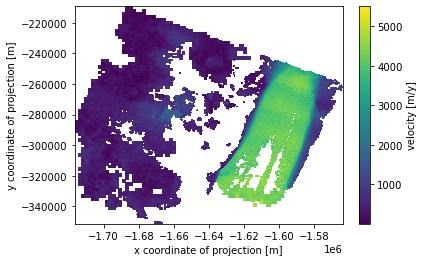

In [38]:
velocity_granule.v.plot(x='x', y='y')

 
## Data Processing

The most common use case for the velocity granules is to generate a time series. In order to create one, we need to concatenate multiple granules from the region of interest for the time we want information from. ITS_LIVE provides a processing module that will load all the velocity granules on a given directory and use a user defined geojson geometry to clip the files so just the data inside the geometry will be used to create the cube.

> **IMPORTANT:** `load_cube` is not a lazy function. It will allocate granaules on memory in order to create the cube. This means that if we try to load 100,000 granules the kernel will most likely run out of memory. 
* Note: If we don't use the map widget we can also use a handy function to get the geojson polygon from a bounding box.

The signature of the `load_cube` method is `load_cube(project_folder, clip_geom=geometry, include_all_projections=False)`

The parameters are:
* **project_folder**: The file path pattern for NetCDF velocity files
* **clip_geom**: gejson geometry dictionary, this geometry will be used to [clip the files](https://corteva.github.io/rioxarray/html/examples/clip_geom.html)
* **include_all_projections**: True or False, if True the cube will include granules on different UTM zones than the most common one for the selected area.

**Note: The following cells are intended to work after multiple velocity granules from different years and the same region are downloaded.**


In [40]:
from VelocityProcessing import VelocityProcessing as vp

# If we have a list of coordinates or a bbox we can get the correspondant geojson by

# geometry = vp.box_to_geojson([-49.79, 69.06, -48.55, 69.25])
# geometry = vp.polygon_to_geojson([(-48.55, 69.06),(-48.55, 69.25),(-49.79, 69.25),(-49.79, 69.06),(-48.55, 69.06)])

# The load_cube method needs a GeoJSON geometry to clip the region of interest.

geometry = {'type': 'Polygon',
'coordinates': [[[-101.155511, -74.738709],
  [-99.117207, -75.087959],
  [-99.879774, -75.46007],
  [-102.42516, -74.925034],
  [-101.155511, -74.738709]]]}

# if we are using the widget
# geometry = m.get_current_selection()['geometry'] 
geometry

{'type': 'Polygon',
 'coordinates': [[[-101.155511, -74.738709],
   [-99.117207, -75.087959],
   [-99.879774, -75.46007],
   [-102.42516, -74.925034],
   [-101.155511, -74.738709]]]}

In [41]:
%%time
# File pattern for our curent search folder.
project_folder = 'data/pine-1996-2019/*.nc'

cube = vp.load_cube(project_folder,
                    clip_geom=geometry,
                    include_all_projections=True)
cube

CPU times: user 41.6 s, sys: 889 ms, total: 42.5 s
Wall time: 42.5 s


<xarray.Dataset>
Dimensions:              (time: 200, x: 298, y: 400)
Coordinates:
  * x                    (x) float64 -1.636e+06 -1.636e+06 ... -1.565e+06
  * y                    (y) float64 -3.541e+05 -3.539e+05 ... -2.584e+05
  * time                 (time) datetime64[ns] 1996-12-19 ... 2017-01-05
    Polar_Stereographic  int64 0
Data variables:
    vx                   (time, y, x) float32 nan nan nan nan ... nan nan nan
    vy                   (time, y, x) float32 nan nan nan nan ... nan nan nan
    v                    (time, y, x) float32 nan nan nan nan ... nan nan nan
    chip_size_width      (time, y, x) float32 nan nan nan nan ... nan nan nan
    chip_size_height     (time, y, x) float32 nan nan nan nan ... nan nan nan
    interp_mask          (time, y, x) float64 nan nan nan nan ... 0.0 0.0 0.0
Attributes:
    GDAL_AREA_OR_POINT:       Area
    Conventions:              CF-1.6
    date_created:             31-Mar-2020 05:44:18
    title:                    autoRIFT surface velocities
    author:                   Alex S. Gardner, JPL/NASA
    institution:              NASA Jet Propulsion Laboratory (JPL), Californi...
    scene_pair_type:          optical
    motion_detection_method:  feature
    motion_coordinates:       map
    grid_mapping:             Polar_Stereographic

(array([5.105220e+05, 2.417960e+05, 2.363840e+05, 5.503860e+05,
        1.184144e+06, 9.083740e+05, 1.170000e+04, 2.360000e+02,
        7.400000e+01, 5.600000e+01]),
 array([   0. ,  789.5, 1579. , 2368.5, 3158. , 3947.5, 4737. , 5526.5,
        6316. , 7105.5, 7895. ], dtype=float32),
 <BarContainer object of 10 artists>)

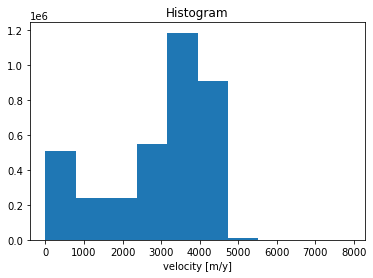

In [42]:
# Histogram of velocities, useful to discard outliers.
cube.v.plot.hist()

Text(0.5, 0.98, 'Pine Island Glacier Yearly Mean Velocity m/y')

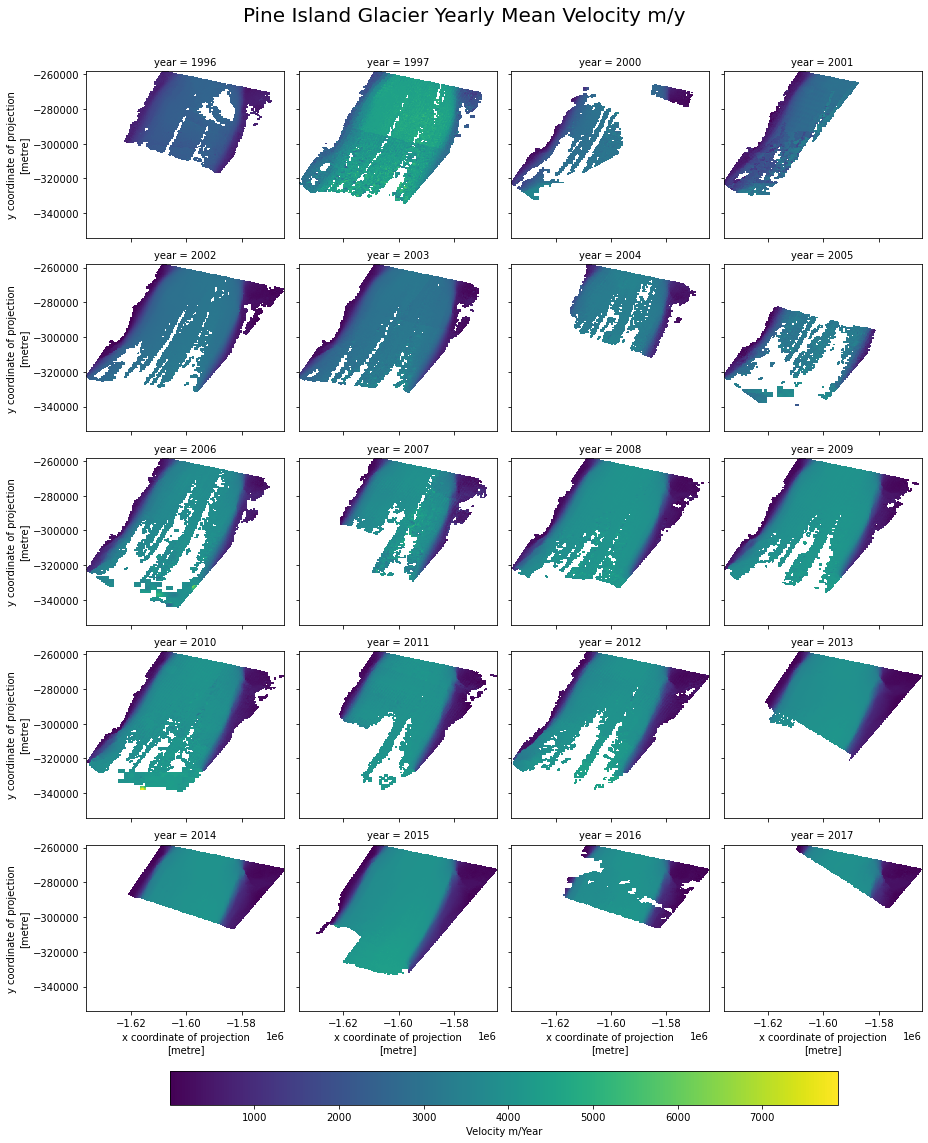

In [43]:
# We can now use xarray operations to calculate means/max etc and plot them over time.
cube_yearly = cube.groupby('time.year').mean()
plot = cube_yearly.v.plot(x='x',
                          y='y',
                          col='year',
                          col_wrap=4,
                          cbar_kwargs=dict(
                              orientation= 'horizontal',
                              shrink=0.8,
                              anchor=(0.5, -0.8),
                              label='Velocity m/Year')
                         )

plot.fig.subplots_adjust(top=0.92)
plot.fig.suptitle("Pine Island Glacier Yearly Mean Velocity m/y",
                  fontsize=20, fontdict={"weight": "bold"})